In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import seaborn as sns

In [126]:
with np.load("/home/don/Asg4/notMNIST.npz", allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

    


In [127]:
#x_train.shape

In [128]:
#single_image = x_train[0]

In [129]:
#single_image

In [130]:
#plt.imshow(single_image)

In [131]:
#y_train

In [132]:
#y_train.shape

In [133]:
#y_example = to_categorical(y_train)

In [134]:
#y_example.shape

In [135]:
#y_example[0]

In [136]:
#y_example[5]

In [137]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [138]:
y_cat_train = to_categorical(y_train,10)

In [139]:
#single_image.min()

In [140]:
#scale pixel values
x_train = x_train/255

In [141]:
#scale pixel values
x_test = x_test/255

In [142]:
x_train.shape

(60000, 28, 28)

In [143]:
#batch size and width,height,color
x_train = x_train.reshape(60000,28,28,1)

In [144]:
x_test = x_test.reshape(10000,28,28,1)

In [145]:
model = Sequential()
#input_shape should match the size of one picture
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid', input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#flatten images: preprocessing step
model.add(Flatten())

model.add(Dense(128,activation='relu'))

#output layer: softmax for multiclass problem
#number of neurons should match the number of categories: 0 through 9 = 10 categorical possibilities
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['acc'])

In [146]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [147]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
         callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.5028 - acc: 0.8538 - val_loss: 0.2167 - val_acc: 0.9354
Epoch 2/10
60000/60000 [==============================] - 58s 966us/sample - loss: 0.3509 - acc: 0.8941 - val_loss: 0.1894 - val_acc: 0.9430
Epoch 3/10
60000/60000 [==============================] - 50s 837us/sample - loss: 0.2891 - acc: 0.9120 - val_loss: 0.1755 - val_acc: 0.9479
Epoch 4/10
60000/60000 [==============================] - 47s 785us/sample - loss: 0.2353 - acc: 0.9272 - val_loss: 0.1847 - val_acc: 0.9456


In [148]:
#model evaluation
metrics = pd.DataFrame(model.history.history)

In [149]:
metrics

,loss,acc,val_loss,val_acc
0,0.502759,0.853767,0.216651,0.9354
1,0.350874,0.894083,0.189394,0.9430
2,0.289148,0.911967,0.175515,0.9479
3,0.235299,0.927150,0.184712,0.9456


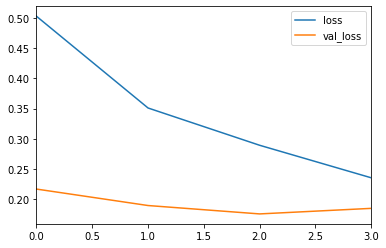

In [150]:
metrics[['loss','val_loss']].plot()

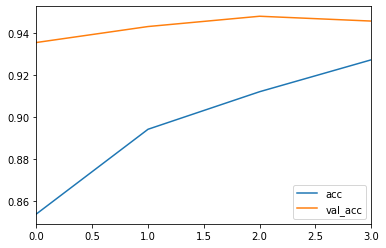

In [151]:
metrics[['acc','val_acc']].plot()

In [152]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.1847115246541798, 0.9456]

In [153]:
predictions=model.predict_classes(x_test)

In [154]:
predictions

array([5, 7, 5, ..., 0, 1, 0])

In [155]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       998
           1       0.94      0.96      0.95       997
           2       0.92      0.96      0.94      1002
           3       0.94      0.96      0.95      1002
           4       0.93      0.94      0.94       997
           5       0.97      0.94      0.96       997
           6       0.97      0.93      0.95       999
           7       0.97      0.95      0.96      1005
           8       0.90      0.93      0.91      1001
           9       0.96      0.93      0.95      1002

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [156]:
confusion_matrix(y_test,predictions)

array([[951,   6,   6,   7,   4,   3,   1,  11,   8,   1],
       [  1, 957,   3,   6,  13,   3,   3,   2,   8,   1],
       [  2,   3, 961,   2,  11,   4,  12,   2,   3,   2],
       [  6,   6,   6, 961,   2,   2,   0,   4,   8,   7],
       [  1,   9,  19,   3, 941,   7,   6,   1,   9,   1],
       [  2,   3,   7,   3,  19, 941,   1,   2,  14,   5],
       [  3,  11,  27,   2,  11,   2, 933,   2,   4,   4],
       [ 18,  10,   3,   6,   2,   0,   3, 950,   9,   4],
       [ 12,  10,   9,  13,   4,   3,   4,   6, 929,  11],
       [  3,   2,   2,  17,   1,   2,   3,   2,  38, 932]])

In [194]:
my_number = x_test[66]

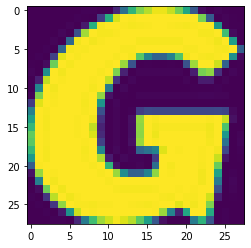

In [195]:
plt.imshow(my_number.reshape(28,28))

In [196]:
#batch size: number of images,width,height,color_channels
test_pred = model.predict_classes(my_number.reshape(1,28,28,1))
test_pred

array([6])

In [197]:
pred = model.predict(my_number.reshape(1,28,28,1))
pred[0]


array([3.9483492e-09, 4.4187121e-09, 1.1839932e-05, 1.5203193e-11,
       1.9668118e-08, 2.0001714e-08, 9.9998820e-01, 1.2543890e-10,
       3.1828776e-10, 1.4792216e-10], dtype=float32)

In [205]:
#pred = pred.reshape(10,1)
#pred[0]

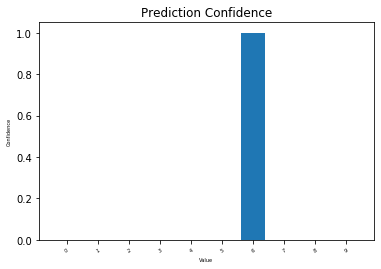

In [199]:
label = ['0', '1','2','3','4','5','6','7','8','9']
index = np.arange(len(label))
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, pred[0])
    plt.xlabel('Value', fontsize=5)
    plt.ylabel('Confidence', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Prediction Confidence')
    plt.show()
plot_bar_x()

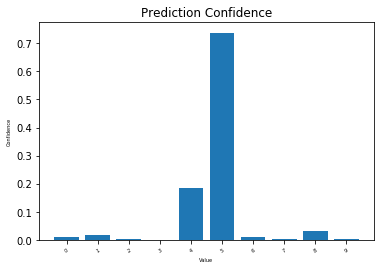

In [204]:
img = plt.imread("/home/don/Asg4/image.png")
if np.amax(img.flatten()) > 1:
          img = img/255
img = 1 - img
test_pred = model.predict_classes(img.reshape(1,28,28,1))
pred = model.predict(img.reshape(1,28,28,1))

label = ['0', '1','2','3','4','5','6','7','8','9']
index = np.arange(len(label))
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, pred[0])
    plt.xlabel('Value', fontsize=5)
    plt.ylabel('Confidence', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Prediction Confidence')
    plt.show()
plot_bar_x()

In [160]:
model.save("notMNIST.h5")